# Multiple Comparisons

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

In [2]:
# Importing the Coughing Kids example data again
dm = [4,6,9,4,7,7,7,9,12,10,11,6,3,4,9,12,7,6,8,12,12,4,12,13,7,10,13,9,4,4,10,15,9]
honey = [12,11,15,11,10,13,10,4,15,16,9,14,10,6,10,8,11,12,12,8,12,9,11,15,10,1,9,13,8,12,10,8,9,5,12]
placebo = [5,8,6,1,0,8,12,8,7,7,1,6,7,7,12,7,9,7,9,5,11,9,5,6,8,8,6,7,10,9,4,8,7,3,1,4,3]
labels = ['dm'] * len(dm) + ['honey'] * len(honey) + ['placebo'] * len(placebo)
scores = pd.DataFrame({'treatment':labels, 'score':dm+honey+placebo})

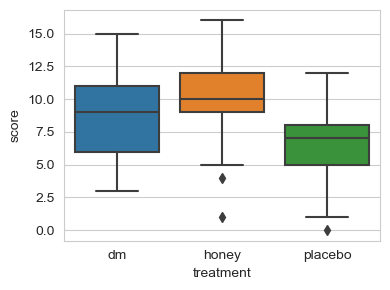

In [3]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(data=scores, x='treatment', y='score',ax=ax)
fig.tight_layout()

In [4]:
def anova(model):
    import statsmodels.stats.api as sms
    at = sms.anova_lm(model, typ=2)
    at['mean_sq'] = at['sum_sq'] / at['df']
    at = at.reindex(['df','sum_sq','mean_sq','F','PR(>F)'],axis=1)
    return at

In [5]:
model = smf.ols('score ~ C(treatment)',data=scores).fit()
anova(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),2.0,259.842471,129.921236,13.276934,0.000008
Residual,102.0,998.119434,9.785485,NaN,NaN


### Bonferroni

In [6]:
scores.groupby('treatment').describe()

score                                                 
          count       mean       std  min  25%   50%   75%   max
treatment                                                       
dm         33.0   8.333333  3.256404  3.0  6.0   9.0  11.0  15.0
honey      35.0  10.314286  3.197163  1.0  9.0  10.0  12.0  16.0
placebo    37.0   6.513514  2.940348  0.0  5.0   7.0   8.0  12.0

In [7]:
fwer = 0.05
num_treatments = 3
alpha_bonf = fwer / math.comb(num_treatments,2)
alpha_bonf

0.016666666666666666

In [8]:
stats.ttest_ind(a=dm, b=honey)

Ttest_indResult(statistic=-2.5307154018048656, pvalue=0.013775015614768321)

In [9]:
stats.ttest_ind(a=dm, b=placebo)

Ttest_indResult(statistic=2.45721098151115, pvalue=0.016557963996109284)

In [10]:
stats.ttest_ind(a=honey, b=placebo)

Ttest_indResult(statistic=5.254329248484621, pvalue=1.5287815104358261e-06)

In [12]:
multicomp = sms.multicomp.MultiComparison(data=scores['score'], groups=scores['treatment'])

In [13]:
mc = multicomp.allpairtest(testfunc=stats.ttest_ind, alpha=fwer, method='bonf')
mc

(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[-2.53071540e+00,  1.37750156e-02],
         [ 2.45721098e+00,  1.65579640e-02],
         [ 5.25432925e+00,  1.52878151e-06]]),
  array([ True,  True,  True]),
  array([4.13250468e-02, 4.96738920e-02, 4.58634453e-06]),
  0.016952427508441503,
  0.016666666666666666),
 array([('dm', 'honey', -2.5307, 0.0138, 0.0413,  True),
        ('dm', 'placebo',  2.4572, 0.0166, 0.0497,  True),
        ('honey', 'placebo',  5.2543, 0.    , 0.    ,  True)],
       dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<f8'), ('pval', '<f8'), ('pval_corr', '<f8'), ('reject', '?')]))

In [14]:
mc[0]

group1,group2,stat,pval,pval_corr,reject
dm,honey,-2.5307,0.0138,0.0413,True
dm,placebo,2.4572,0.0166,0.0497,True
honey,placebo,5.2543,0.0,0.0,True


In [15]:
mc[1]

(array([[-2.53071540e+00,  1.37750156e-02],
        [ 2.45721098e+00,  1.65579640e-02],
        [ 5.25432925e+00,  1.52878151e-06]]),
 array([ True,  True,  True]),
 array([4.13250468e-02, 4.96738920e-02, 4.58634453e-06]),
 0.016952427508441503,
 0.016666666666666666)

In [16]:
mc[2]

array([('dm', 'honey', -2.5307, 0.0138, 0.0413,  True),
       ('dm', 'placebo',  2.4572, 0.0166, 0.0497,  True),
       ('honey', 'placebo',  5.2543, 0.    , 0.    ,  True)],
      dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<f8'), ('pval', '<f8'), ('pval_corr', '<f8'), ('reject', '?')])

In [17]:
pd.DataFrame(mc[2])

,group1,group2,stat,pval,pval_corr,reject
0,dm,honey,-2.5307,0.0138,0.0413,True
1,dm,placebo,2.4572,0.0166,0.0497,True
2,honey,placebo,5.2543,0.0000,0.0000,True


## Bonferroni-Holm

In [18]:
mc = multicomp.allpairtest(testfunc=stats.ttest_ind, alpha=fwer, method='Holm')

In [19]:
mc[0]

group1,group2,stat,pval,pval_corr,reject
dm,honey,-2.5307,0.0138,0.0276,True
dm,placebo,2.4572,0.0166,0.0276,True
honey,placebo,5.2543,0.0,0.0,True


## Tukey

In [20]:
mc = multicomp.tukeyhsd(alpha=fwer)

In [22]:
mc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
dm,honey,1.981,0.0279,0.1757,3.7862,True
dm,placebo,-1.8198,0.0441,-3.6013,-0.0384,True
honey,placebo,-3.8008,0.0,-5.5551,-2.0465,True


*** 
# Progress Check

In [23]:
ano = pd.read_csv('Anorexia.dat', sep='\s+')
ano['change'] = ano['after'] - ano['before']
ano

,subject,therapy,before,after,change
0,1,cb,80.5,82.2,1.7
1,2,cb,84.9,85.6,0.7
2,3,cb,81.5,81.4,-0.1
3,4,cb,82.6,81.9,-0.7
4,5,cb,79.9,76.4,-3.5
...,...,...,...,...,...
67,68,c,84.4,84.7,0.3
68,69,c,79.6,81.4,1.8
69,70,c,77.5,81.2,3.7
70,71,c,72.3,88.2,15.9


In [24]:
fwer = 0.05
num_treatments = 3
alpha_bonf = fwer / math.comb(num_treatments,2)
alpha_bonf

0.016666666666666666

In [26]:
multicomp = sms.multicomp.MultiComparison(data=ano['change'], groups=ano['therapy'])
mc = multicomp.allpairtest(testfunc=stats.ttest_ind, alpha=fwer, method='bonf')
mc[0]

group1,group2,stat,pval,pval_corr,reject
c,cb,-1.676,0.0996,0.2989,False
c,f,-3.2227,0.0025,0.0075,True
cb,f,-1.9216,0.0612,0.1835,False


In [27]:
multicomp.tukeyhsd(alpha=fwer).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
c,cb,3.4569,0.2124,-1.4135,8.3273,False
c,f,7.7147,0.0045,2.0901,13.3393,True
cb,f,4.2578,0.1607,-1.2506,9.7662,False


In [28]:
fev = pd.read_csv('FEV-1.dat', sep='\s+')
fev['change'] = fev['fev'] - fev['base']
fev

,Obs,patient,base,drug,hour,fev,change
0,1,1,2.46,A,1,2.68,0.22
1,2,2,3.50,A,1,3.95,0.45
2,3,3,1.96,A,1,2.28,0.32
3,4,4,3.44,A,1,4.08,0.64
4,5,5,2.80,A,1,4.09,1.29
...,...,...,...,...,...,...,...
571,572,68,3.50,P,8,3.61,0.11
572,573,69,2.86,P,8,2.89,0.03
573,574,70,2.42,P,8,3.75,1.33
574,575,71,3.66,P,8,3.74,0.08


In [32]:
fev_1hr = fev[fev['hour']==1]
multicomp = sms.multicomp.MultiComparison(data=fev_1hr['change'], groups=fev_1hr['drug'])

In [34]:
multicomp.tukeyhsd(alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,C,0.2208,0.2504,-0.1087,0.5504,False
A,P,-0.6412,0.0,-0.9708,-0.3117,True
C,P,-0.8621,0.0,-1.1917,-0.5325,True


## Two-Way Multinomial Experiment (Contingency Test)

In [36]:
grades = np.array([[141,161],[44,61]])
grades

array([[141, 161],
       [ 44,  61]])

In [37]:
stat, pval, df, expected = stats.chi2_contingency(grades)

In [38]:
stat

0.539179806580468

In [39]:
pval

0.46277284007222674

In [40]:

df

1

In [41]:
expected

array([[137.27272727, 164.72727273],
       [ 47.72727273,  57.27272727]])

In [42]:
stats.chi2.isf(q=0.05, df=1)

3.8414588206941285

***
# Progress Check

In [44]:
happy = pd.read_csv('Happy.dat', sep='\s+')
happy

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
...,...,...,...,...
2137,2138,3,3,female
2138,2139,3,3,female
2139,2140,3,3,female
2140,2141,3,3,female


In [46]:
happy.groupby(['gender','happiness']).describe()

subject                                                    \
                   count         mean         std     min      25%     50%   
gender happiness                                                             
female 1           353.0  1323.546742  306.063568   995.0  1083.00  1171.0   
       2           642.0  1630.289720  271.293545  1221.0  1381.25  1628.5   
       3           153.0  1874.379085  229.146500  1496.0  1761.00  1799.0   
male   1           295.0   257.227119  245.657079     1.0    74.50   148.0   
       2           553.0   560.023508  230.536365   207.0   345.00   549.0   
       3           146.0   746.164384  212.420209   436.0   619.25   655.5   

                                  marital                                     \
                      75%     max   count      mean       std  min  25%  50%   
gender happiness                                                               
female 1          1562.00  1876.0   353.0  1.552408  0.796442  1.0  1.0  1.0   
       2          1914.75  2075.0   642.0  1.881620  0.851724  1.0  1.0  2.0   
       3          2104.00  2142.0   153.0  2.254902  0.748063  1.0  2.0  2.0   
male   1           483.50   716.0   295.0  1.491525  0.794815  1.0  1.0  1.0   
       2           788.00   926.0   553.0  1.965642  0.891127  1.0  1.0  2.0   
       3           957.75   994.0   146.0  2.239726  0.799179  1.0  2.0  2.0   

                            
                  75%  max  
gender happiness            
female 1          2.0  3.0  
       2          3.0  3.0  
       3          3.0  3.0  
male   1          2.0  3.0  
       2          3.0  3.0  
       3          3.0  3.0

In [47]:
happy.groupby(['happiness']).describe()

subject                                                           \
            count         mean         std    min     25%     50%      75%   
happiness                                                                    
1           648.0   838.108025  600.669503    1.0  162.75  1023.5  1185.25   
2          1195.0  1135.011715  590.847128  207.0  571.50  1265.0  1650.50   
3           299.0  1323.478261  606.504836  436.0  657.50  1499.0  1800.50   

                  marital                                               
              max   count      mean       std  min  25%  50%  75%  max  
happiness                                                               
1          1876.0   648.0  1.524691  0.795665  1.0  1.0  1.0  2.0  3.0  
2          2075.0  1195.0  1.920502  0.870822  1.0  1.0  2.0  3.0  3.0  
3          2142.0   299.0  2.247492  0.772179  1.0  2.0  2.0  3.0  3.0

In [49]:
hap_table = pd.crosstab(happy['gender'],happy['happiness'])
hap_table

happiness,1,2,3
gender,,,
female,353,642,153
male,295,553,146


In [51]:
stat, pval, df, expected = stats.chi2_contingency(hap_table)
print(stat)
print(pval)

0.9165315892565513
0.6323793708278013
